In [169]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [171]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
rawData = pd.read_csv('Cleaned_Data_Course_2.csv')
rawData.head()

,Customer ID,Credit Limit,Marital Status,Age,Repayment September,Repayment August,Repayment July,Repayment June,Repayment May,Repayment April,...,Amount Paid April,Gender_female,Gender_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_default,Default_default payment next month,Default_not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,1,0,0,0,0,1,1,0,0
1,2,120000,2,26,-1,2,0,0,0,2,...,2000,1,0,0,0,0,1,1,0,0
2,3,90000,2,34,0,0,0,0,0,0,...,5000,1,0,0,0,0,1,0,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1000,1,0,0,0,0,1,0,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,679,0,1,0,0,0,1,0,0,1


In [174]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Customer ID                         30000 non-null  int64
 1   Credit Limit                        30000 non-null  int64
 2   Marital Status                      30000 non-null  int64
 3   Age                                 30000 non-null  int64
 4   Repayment September                 30000 non-null  int64
 5   Repayment August                    30000 non-null  int64
 6   Repayment July                      30000 non-null  int64
 7   Repayment June                      30000 non-null  int64
 8   Repayment May                       30000 non-null  int64
 9   Repayment April                     30000 non-null  int64
 10  Bill Amount September               30000 non-null  int64
 11  Bill Amount August                  30000 non-null  int64
 12  Bill

In [175]:
X = rawData[['Repayment September','Repayment August', 'Repayment July', 'Repayment June', 'Repayment May', 'Age', 'Gender_male']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Repayment September,Repayment August,Repayment July,Repayment June,Repayment May,Age,Gender_male
0,2,2,-1,-1,-2,24,0
1,-1,2,0,0,0,26,0
2,0,0,0,0,0,34,0
3,0,0,0,0,0,37,0
4,-1,0,-1,0,0,57,1


In [176]:
y = rawData['Default_default']

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
model = LinearRegression(n_jobs=10)

In [179]:
print(y)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default_default, Length: 30000, dtype: int64


In [180]:
print(cross_val_score(model, X, y, cv=3)) 

[0.09367948 0.11933249 0.11430614]


In [181]:
model = RandomForestRegressor()

In [182]:
print(cross_val_score(model, X, y, cv=3))

[0.0660156  0.10571061 0.10034618]


In [183]:
model = SVR()

In [184]:
print(cross_val_score(model, X, y, cv=3))

[0.03234674 0.08485781 0.10305979]


In [185]:
algosClass = []

In [186]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [187]:
algosClass.append(('Linear Regression',LinearRegression()))

In [188]:
algosClass.append(('Support Vector Regression',SVR()))

In [189]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [190]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.08996951053990147
Linear Regression 0.10910603586056382
Support Vector Regression 0.07342144572500386


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state =0)

In [192]:
algo = LinearRegression()
model = algo.fit(X_train, y_train)

In [193]:
y_pred = model.predict(X_test)


In [194]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

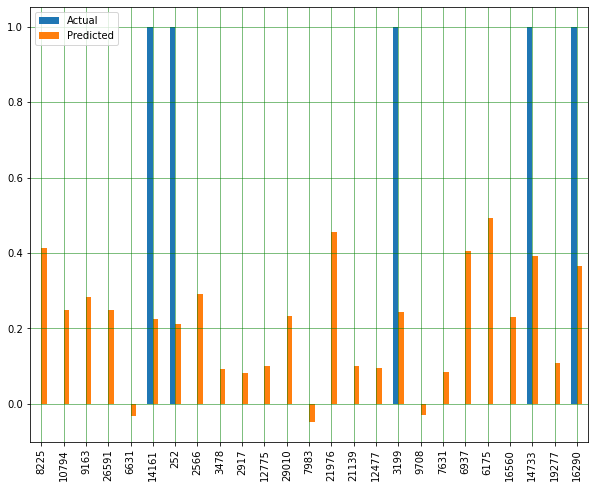

In [195]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [196]:
X = rawData[['Age', 'Gender_male', 'Gender_female', 'Education_high school']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Age,Gender_male,Gender_female,Education_high school
0,24,0,1,0
1,26,0,1,0
2,34,0,1,0
3,37,0,1,0
4,57,1,0,0


In [197]:
y = rawData['Default_default']

In [198]:
model = LinearRegression(n_jobs=10)

In [199]:
print(cross_val_score(model, X, y, cv=3))

[0.0008468  0.00105915 0.00077769]


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state =0)

In [201]:
algo = LinearRegression()
model = algo.fit(X_train, y_train)

In [202]:
y_pred = model.predict(X_test)

In [203]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

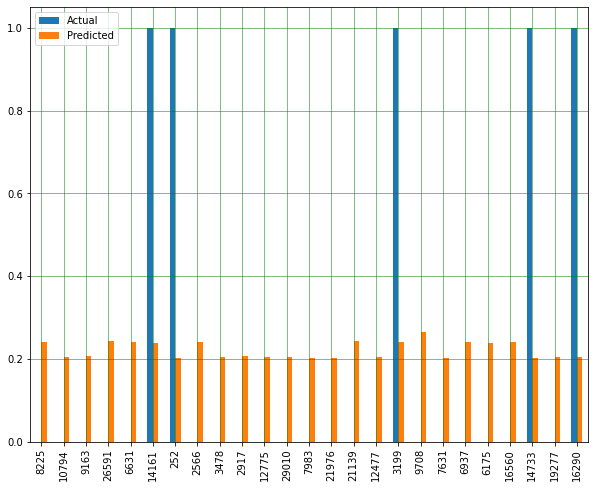

In [204]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [205]:
predictions = model.predict(X_test)

In [206]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [207]:
from math import sqrt

In [208]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [209]:
predRsquared = r2_score(y_test,predictions)

In [210]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.002
RMSE: 0.411


ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 9000.

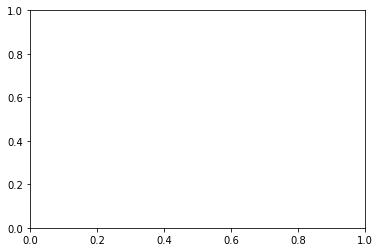

In [211]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [212]:
X = rawData[['Age', 'Gender_male', 'Gender_female', 'Education_graduate school', 'Education_high school', 'Education_university', 'Marital Status', 'Default_default', 'Default_not default']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Age,Gender_male,Gender_female,Education_graduate school,Education_high school,Education_university,Marital Status,Default_default,Default_not default
0,24,0,1,0,0,1,1,1,0
1,26,0,1,0,0,1,2,1,0
2,34,0,1,0,0,1,2,0,1
3,37,0,1,0,0,1,1,0,1
4,57,1,0,0,0,1,1,0,1


In [213]:
y = rawData['Credit Limit']

In [214]:
model = LinearRegression(n_jobs=10)

In [215]:
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: Credit Limit, Length: 30000, dtype: int64


In [216]:
print(cross_val_score(model, X, y, cv=3))

[0.12907817 0.14288229 0.11472442]


In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state =0)

In [218]:
algo = LinearRegression()
model = algo.fit(X_train, y_train)

In [219]:
y_pred = model.predict(X_test)

In [220]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

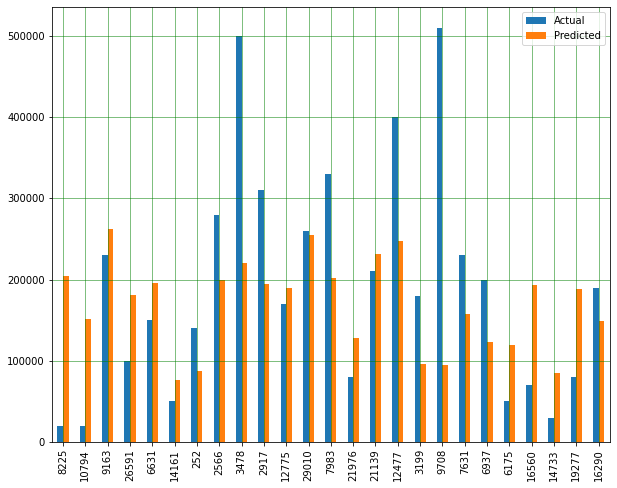

In [221]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [222]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [223]:
predRsquared = r2_score(y_test,predictions)

In [224]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.134
RMSE: 122096.889


ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 9000.

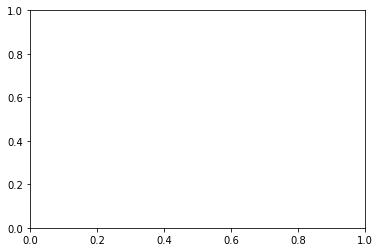

In [148]:
plt.scatter(y_test, predictions, color=['blue','green'])
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [225]:
algosClass = []

In [226]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [227]:
algosClass.append(('Linear Regression',LinearRegression()))

In [228]:
algosClass.append(('Support Vector Regression',SVR()))

In [229]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [230]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.17197034451134896
Linear Regression 0.12889496070954723
Support Vector Regression -0.05479950334743474


In [231]:
RandomForestRegressor().fit(X_train,y_train)
print(cross_val_score(RandomForestRegressor(), X_train, y=y_train))

[0.1496368  0.14502286 0.17822421 0.1564493  0.17675061]


In [232]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [233]:
predRsquared = r2_score(y_test,predictions)

In [234]:
rSquared = RandomForestRegressor().score(X_train,y_train)
mse = np.mean((modelRF.predict(X_test) - y_test) ** 2)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [236]:
y = rawData['Default_default']

In [240]:
model = LinearRegression(n_jobs=10, shuffle=True)

TypeError: __init__() got an unexpected keyword argument 'shuffle'

In [238]:
X = rawData[['Age']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Age
0,24
1,26
2,34
3,37
4,57


In [239]:
print(cross_val_score(model, X, y, cv=3))

[-0.00059329 -0.00096317 -0.00213469]
